In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
class MultiLinear:
    def __init__(self,n):
        self.w = np.random.randn(1,n) # shape of w is (1,n)
        self.b = 0
    def predict(self,x):
        ypre = np.matmul(x,self.w.T)+self.b
        #               (m*n)*(n,1) = (m,1)
        return ypre
    def loss(self,ypre,y):
        loss = ((ypre-y)**2)/(2*(y.shape[0]))
        return np.sum(loss)
    def grad(self,x,y):
        m = y.shape[0]
        ypre = self.predict(x)
        dw = np.matmul((ypre-y).T,x)
        dw = dw/m
        db = np.sum(ypre-y)*(1/m)
        return dw,db
    def fit(self,x,y,epochs,lr):
        self.w_hist = [self.w]
        self.b_hist = [self.b]
        loss = []
        ypre = self.predict(x)
        intial_loss = self.loss(ypre,y)
        loss.append(intial_loss)
        for i in range(epochs):
            dw,db = self.grad(x,y)
            self.w = self.w - lr*dw
            self.b = self.b - lr*db
            ypre = self.predict(x)
            los = self.loss(ypre,y)
            loss.append(los)
            self.w_hist.append(self.w)
            self.b_hist.append(self.b)
            print("epoch",i,"loss",los)
        print("final loss",los)
        plt.plot(loss,'-o')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
            
            

In [5]:
df = pd.read_csv("real_estate.csv")

In [6]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
x = df.iloc[:,2:-1]
y = df.iloc[:,[-1]]

In [12]:
x.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [13]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
x_trans = sc.fit_transform(x)

In [17]:
x_trans.shape

(414, 5)

In [ ]:
y = y.to_numpy()

In [25]:
y.shape

(414, 1)

In [47]:
model = MultiLinear(x_trans.shape[1])

epoch 0 loss 647.8530301037542
epoch 1 loss 528.2897271582558
epoch 2 loss 433.52554214565777
epoch 3 loss 357.8647744121407
epoch 4 loss 297.15167276456543
epoch 5 loss 248.26556626502054
epoch 6 loss 208.81028221885606
epoch 7 loss 176.9153682294475
epoch 8 loss 151.1034167202118
epoch 9 loss 130.19780434364296
epoch 10 loss 113.25612112188205
epoch 11 loss 99.52062634201718
epoch 12 loss 88.38046635198916
epoch 13 loss 79.3423301819048
epoch 14 loss 72.00735526481675
epoch 15 loss 66.05278212186785
epoch 16 loss 61.21728749600352
epoch 17 loss 57.289206848745785
epoch 18 loss 54.097048932705064
epoch 19 loss 51.50184110116198
epoch 20 loss 49.39094371841601
epoch 21 loss 47.6730472037374
epoch 22 loss 46.27412312938846
epoch 23 loss 45.1341460730932
epoch 24 loss 44.20443873915108
epoch 25 loss 43.44552140909026
epoch 26 loss 42.825369657938275
epoch 27 loss 42.31800266869823
epoch 28 loss 41.90233930820548
epoch 29 loss 41.56127110285025
epoch 30 loss 41.28091093291586
epoch 31 los

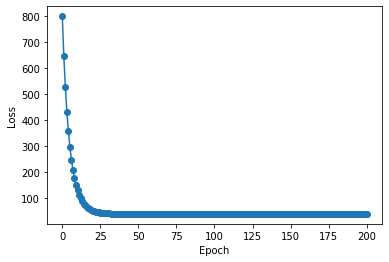

In [48]:
model.fit(x_trans,y,200,lr = 0.1)

In [54]:
def prediction(model):
    l = []
    l.append(float(input("enter house age:")))
    l.append(float(input("distance to the nearest MRT station:")))
    l.append(float(input("no of convenience stores:")))
    l.append(float(input("latitude: ")))
    l.append(float(input('longitude: ')))
    arr = np.asarray([l])
    sc_arr = sc.transform(arr)
    print("price of the house per unit area:",model.predict(sc_arr)[0][0])

In [55]:
prediction(model)

enter house age:10
distance to the nearest MRT station:50
no of convenience stores:10
latitude: 30
longitude: 150
price of the house per unit area: 1242.3809679512367
